In [57]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings
import xarray as xr
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

In [2]:
# set ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
# set main directory
main_dir = r'C:\Users\illic\Python\data_hiwi\Emschergenossenschaft'

In [4]:
# set path to data
emscher_path = os.path.join(main_dir, r'EGLV_PWS_dataset_5min_v03.nc')

In [5]:
# read data
ds_emscher = xr.open_dataset(emscher_path)

In [6]:
# id neu setzen
id = np.arange(1, len(ds_emscher.id) + 1, 1) # oder: id = ['id_' + str(id) for id in (np.arange(1, len(ds_emscher.id) + 1, 1))]
ds_emscher['id'] = id

In [8]:
# create DataFrame
df_emscher = pd.DataFrame(data=ds_emscher.rainfall.sel(id=slice(1, 5)).values.T, index=ds_emscher.time.values ,columns=ds_emscher.id.sel(id=slice(1, 5)).values)

In [73]:
df_coordinaten_emscher = pd.DataFrame(data=(ds_emscher.lon.values, ds_emscher.lat.values), index=['lon', 'lat'], columns=ds_emscher.id.values).T

In [76]:
# transform coordinates to x, y

# x, y = fct.LatLon_To_XY(primary_locations_df['lon'], primary_locations_df['lat'])
# coordinates_primary_utm32 = pd.DataFrame({'lon': x, 'lat': y}, index=primary_locations_df.index)

x, y = fct.LatLon_To_XY(df_coordinaten_emscher['lon'], df_coordinaten_emscher['lat'])
coordinates_secondary_utm32 = pd.DataFrame({'lon': x, 'lat': y}, index=df_coordinaten_emscher.index)

In [74]:
df_coordinaten_emscher

,lon,lat
1,6.548694,51.426193
2,6.526900,51.436256
3,6.535824,51.432460
4,6.545567,51.439660
5,6.538055,51.455025
...,...,...
3546,7.727395,51.910908
3547,8.577646,51.683721
3548,8.433512,51.686384
3549,8.637683,51.847763


In [9]:
df_emscher

,1,2,3,4,5
2014-04-26 16:30:00,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:35:00,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:40:00,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:45:00,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:50:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-01-10 23:35:00,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:40:00,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:45:00,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:50:00,NaN,NaN,NaN,NaN,NaN


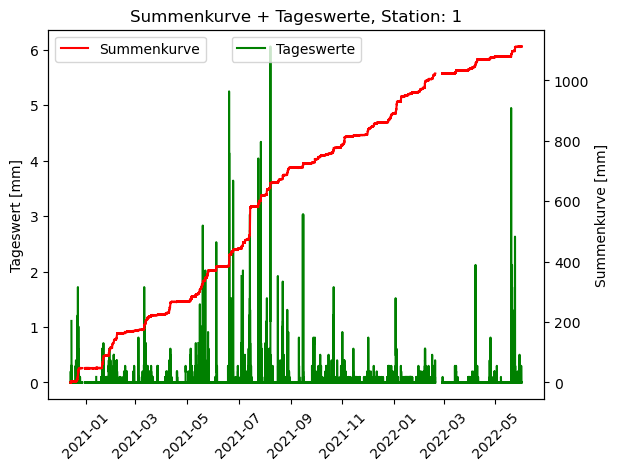

Gesamtniederschlag über Zeitraum: 1112.6 mm



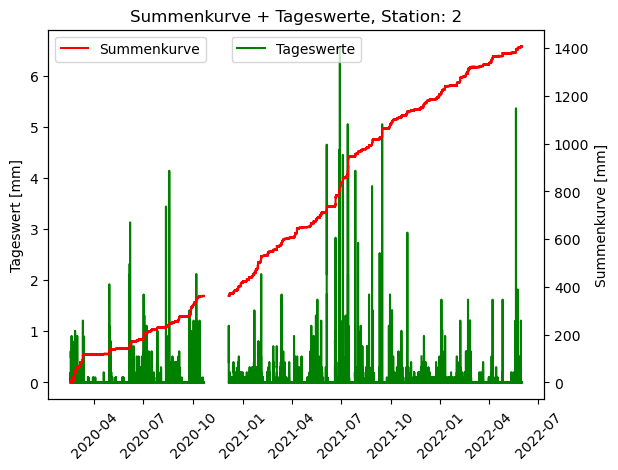

Gesamtniederschlag über Zeitraum: 1406.42 mm



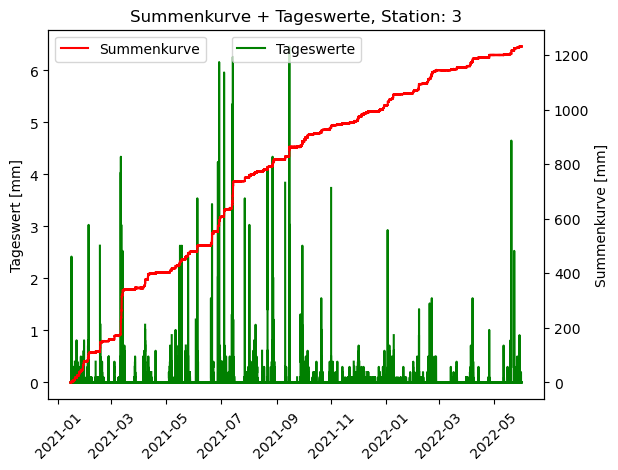

Gesamtniederschlag über Zeitraum: 1231.49 mm



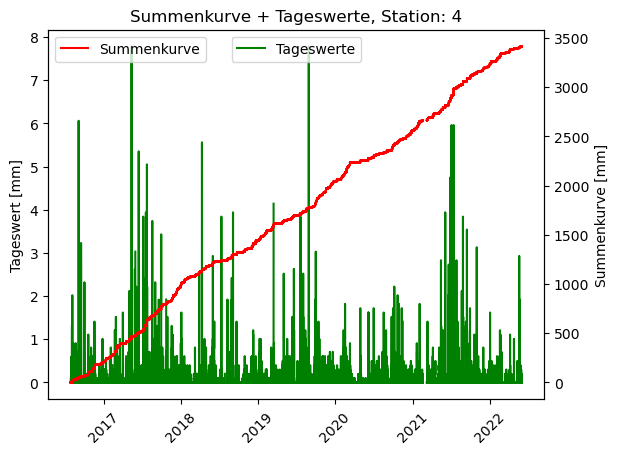

Gesamtniederschlag über Zeitraum: 3413.55 mm



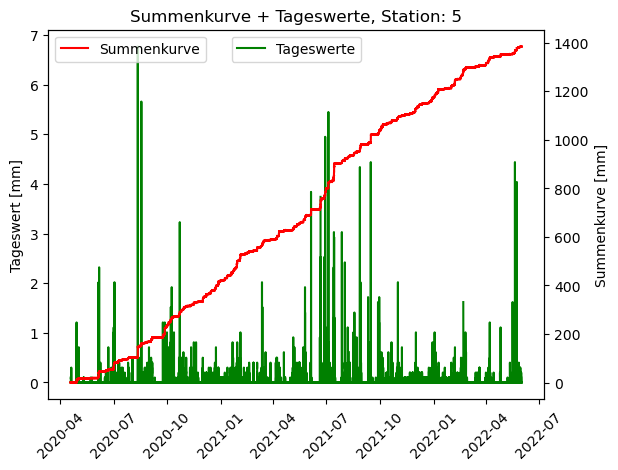

Gesamtniederschlag über Zeitraum: 1384.74 mm



In [10]:
for i in range(1, 6):
    fct.sum_curve(df_emscher, i, df_emscher.index[0], df_emscher.index[-1])

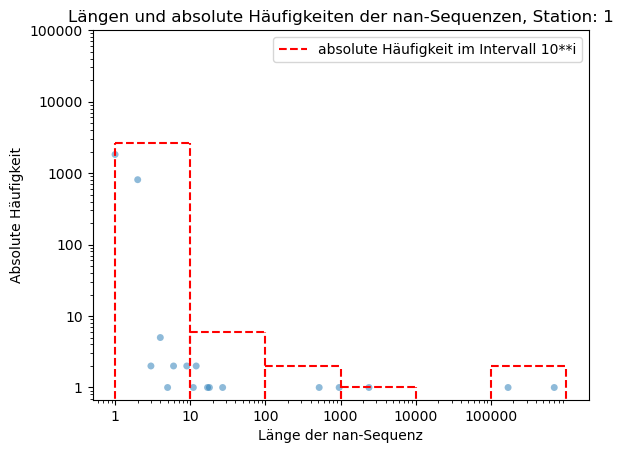

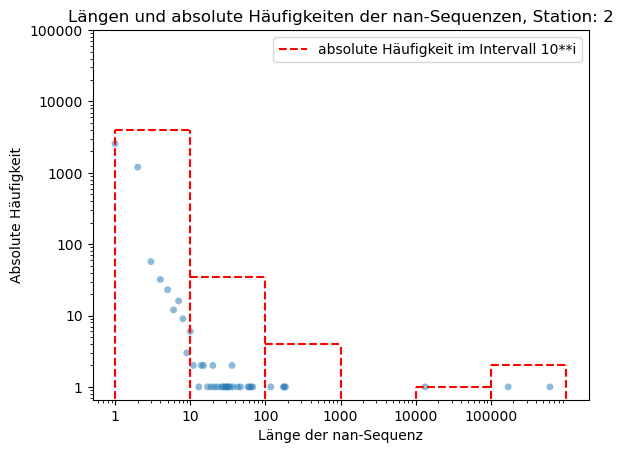

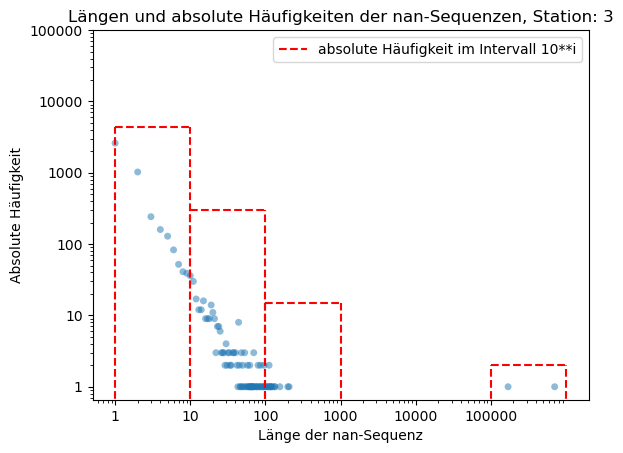

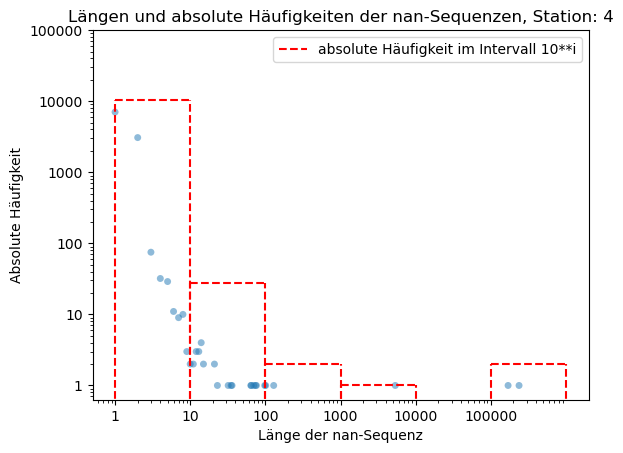

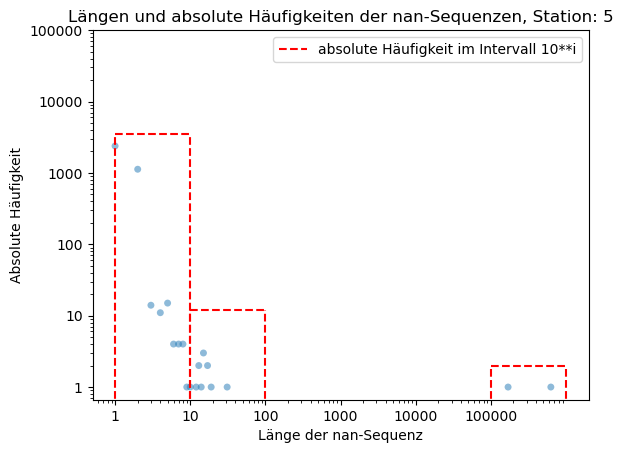

In [11]:
for i in range(1, 6):
    fct.histogramm_scatter(df_emscher, i, '5min')

In [12]:
for i in range(1, 6):
    x, y = np.unique(fct.list_nan_sequences_schnell(df_emscher, i, '5min')[2], return_counts=True)
    print('id', str(i) + ':', 'longest sequenze: ', x.max())

id 1: longest sequenze:  698040
id 2: longest sequenze:  611374
id 3: longest sequenze:  707042
id 4: longest sequenze:  237357
id 5: longest sequenze:  628943


In [13]:
for i in range(1, 6):
    print('id', str(i) + ':', 'Anzahl Peaks:', len(fct.get_data_nan_seq_before_peak(df_emscher, 'sc', i, 0.99)[3]))

id 1: Anzahl Peaks: 23
id 2: Anzahl Peaks: 23
id 3: Anzahl Peaks: 61
id 4: Anzahl Peaks: 136
id 5: Anzahl Peaks: 20


In [14]:
def sum_curve(data, station, date_start, date_end):

    # set DataFrame for this run of this funktion
    dataframe = data
    
    # Messwerte der Station aufsummieren
    sum_list = dataframe.cumsum().values
    sum = dataframe.sum().item()

    # "Summendataframe" erstellen
    index_sum_df = dataframe.time.values
    sum_df = pd.Series(data=sum_list, index=index_sum_df)

    # Subplot erstellen
    fig, ax = plt.subplots()

    # plot Tageswerte
    ax.plot(index_sum_df, dataframe, label='Tageswerte', color='green')
    ax.set_ylabel('Tageswert [mm]')
    plt.xticks(rotation=45)
    plt.legend(loc=9)

    # plot Summenkurve
    ax = ax.twinx()
    ax.plot(index_sum_df, sum_list, label='Summenkurve', color='red')
    ax.set_ylabel('Summenkurve [mm]')
    plt.legend(loc=2)

    name_plot = 'Summenkurve + Tageswerte, Station: ' + str(station)
    plt.title(name_plot)
    plt.xlabel('DateTime')
    plt.legend()
    
    plt.show()
    plt.close()
    
    return print('Gesamtniederschlag über Zeitraum:', round(sum, 2), 'mm\n') # (print('Index Station', str(station), ': \n\n', index_sum_df, '\n\n', 'Summe aktuel zu Zeitstempel:\n\n', sum_df))


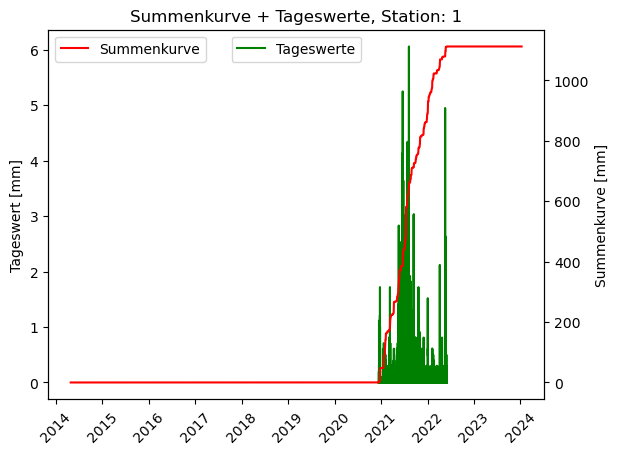

Gesamtniederschlag über Zeitraum: 1112.6 mm



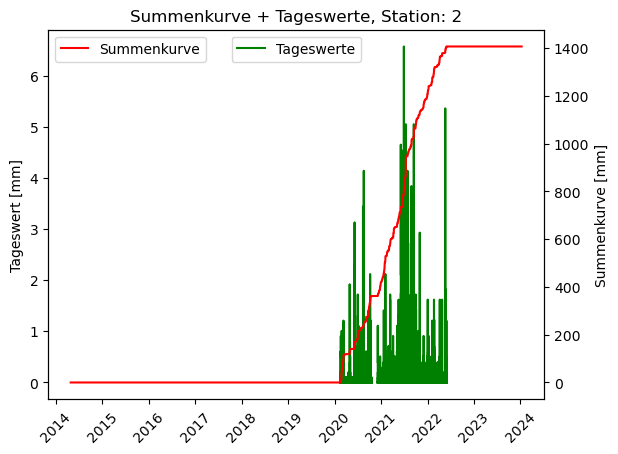

Gesamtniederschlag über Zeitraum: 1406.42 mm



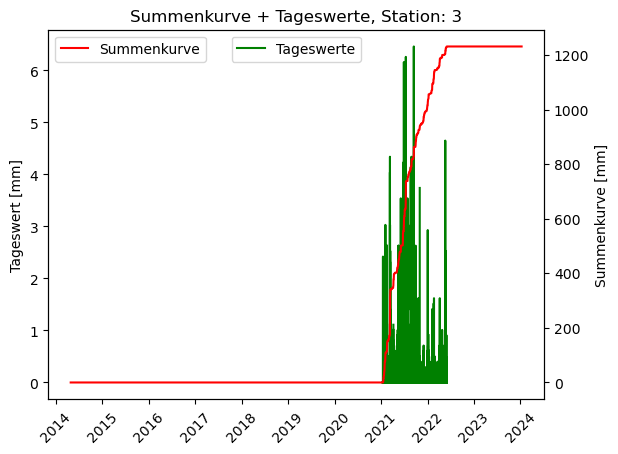

Gesamtniederschlag über Zeitraum: 1231.49 mm



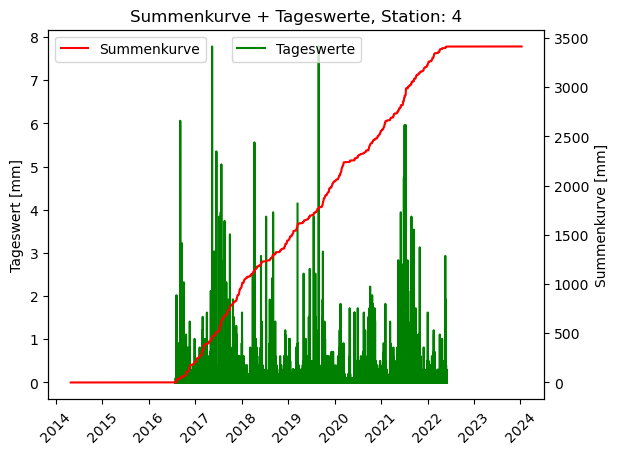

Gesamtniederschlag über Zeitraum: 3413.55 mm



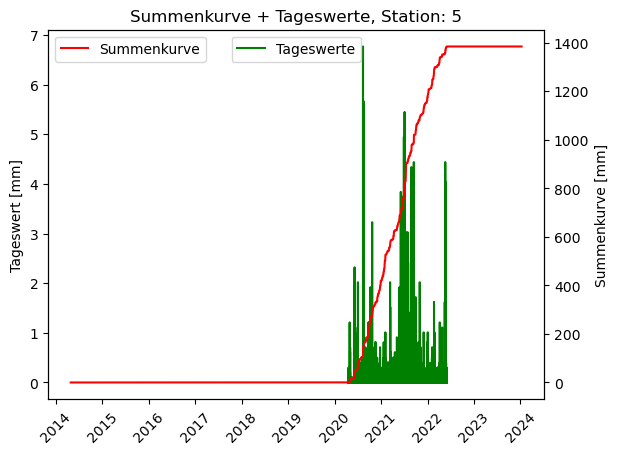

Gesamtniederschlag über Zeitraum: 1384.74 mm



In [15]:
for i in range(1, 6):
    sum_curve(ds_emscher.rainfall.sel(id=i), i, ds_emscher.sel(id=i).time[0], ds_emscher.sel(id=i).time[-1])

In [17]:
list_nans_gesamt = []
list_nan_sequences = []
list_nan_sequences_1_2 = []
list_peaks = []
list_nans_gesamt_corr = []
list_nan_sequences_corr = []
list_verhaeltnis_nans = []
list_verhaeltnis_nan_sequences = []

for station in range(1, 6):
    sum_nan_u = df_emscher[station].isna().sum()
    list_u = fct.list_nan_sequences_schnell(df_emscher, station, '5min')[2]
    x_u, y_u = np.unique(list_u, return_counts=True)
    peaks_u = fct.get_data_nan_seq_before_peak(df_emscher, 'sc', station, 0.99)[3]

    print(station, 'unkorrigiert')
    print('   nans gesamt: ', sum_nan_u)
    print('   nan sequenzen: ', y_u.sum())
    print('   davon 1er und 2er nan sequenzen: ', y_u[0:2].sum())
    print('   peaks: ', len(peaks_u))

    list_nans_gesamt.append(sum_nan_u)
    list_nan_sequences.append(y_u.sum())
    list_nan_sequences_1_2.append(y_u[0:2].sum())
    list_peaks.append(len(peaks_u))

    # sum_nan = df_reutlingen_corrected[station].isna().sum()
    # list = fct.list_nan_sequences_schnell(df_reutlingen_corrected, station, '5min')[2]
    # x, y = np.unique(list, return_counts=True)
    # peaks = fct.get_data_nan_seq_before_peak(df_reutlingen_corrected, 'sc', station, 0.99)[3]

    # print(station, 'korrigiert')
    # print('   nans gesamt: ', sum_nan)
    # print('   nan sequenzen: ', y.sum())
    # print('Verhältnis korrigiert zu unkorrigiert: ', round(((sum_nan_u - sum_nan)/sum_nan_u)*100, 2), '% werden korrigiert')

    # list_nans_gesamt_corr.append(sum_nan)
    # list_nan_sequences_corr.append(y.sum())
    # list_verhaeltnis_nans.append(round(((sum_nan_u - sum_nan)/sum_nan_u)*100))
    # list_verhaeltnis_nan_sequences.append(round(((y_u.sum() - y.sum())/y_u.sum())*100))
    

1 unkorrigiert
   nans gesamt:  875135
   nan sequenzen:  2651
   davon 1er und 2er nan sequenzen:  2628
   peaks:  23
2 unkorrigiert
   nans gesamt:  801910
   nan sequenzen:  3963
   davon 1er und 2er nan sequenzen:  3769
   peaks:  23
3 unkorrigiert
   nans gesamt:  895064
   nan sequenzen:  4694
   davon 1er und 2er nan sequenzen:  3626
   peaks:  61
4 unkorrigiert
   nans gesamt:  427306
   nan sequenzen:  10311
   davon 1er und 2er nan sequenzen:  10109
   peaks:  136
5 unkorrigiert
   nans gesamt:  803653
   nan sequenzen:  3575
   davon 1er und 2er nan sequenzen:  3508
   peaks:  20


In [18]:
ds_emscher

<xarray.Dataset>
Dimensions:      (time: 1021338, id: 3550)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-26T16:30:00 ... 2024-01-10T23:...
  * id           (id) int32 1 2 3 4 5 6 7 ... 3544 3545 3546 3547 3548 3549 3550
    elevation    (id) float64 ...
    lon          (id) float64 ...
    lat          (id) float64 ...
    mac_address  (id) <U17 ...
Data variables:
    rainfall     (id, time) float64 ...
Attributes:
    title:                 PWS data for EGLV Region
    institution:           IWS University of Stuttgart
    history:               compiled from single csv files obtained from API d...
    references:            -
    date_created:          2024-06-13 12:48:03
    Conventions:           OpenSense-0.1
    license restrictions:  CC-BY 4.0 https://creativecommons.org/licenses/by/...
    location:              Emschergenossenschaft/Lippeverband
    source:                Netatmo PWS
    comment:

In [19]:
ds_emscher.sel(id=1).lon.values

array(6.548694)

In [20]:
ds_emscher.sel(id=1).lat.values

array(51.426193)

In [21]:
def coordinates(loc_prim, loc_sec, y, station, ref1, ref2, ref3, ref4):
    
    if y == 'primary':
        coords_lon = loc_prim['lon']
        coords_lat = loc_prim['lat']
    elif y == 'secondary':
        coords_lon = loc_sec.lon
        coords_lat = loc_sec.lat
    elif y == 'both':
        coords_lon_prim = loc_prim['lon']
        coords_lat_prim = loc_prim['lat']
        coords_lon_sec = loc_sec['lon']
        coords_lat_sec = loc_sec['lat']

    if y == 'both':
        name_plot = 'Coordinates ' + y + ' networks'
        plt.scatter(x=coords_lon_prim, y=coords_lat_prim, s=20, color='red', label='primary network', marker='x', linewidth=1)
        plt.scatter(x=coords_lon_sec, y=coords_lat_sec, s=2, color='blue', label='secondary network', alpha=0.5)
        if type(station) == int:
            plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='black')
        plt.legend()
    else:
        name_plot = 'Coordinates ' + y + ' network'
        plt.scatter(x=coords_lon, y=coords_lat, s=10)
        if type(station) == int:
            if y == 'primary':
                plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='red')
            elif y == 'secondary':
                plt.scatter(loc_sec.lon.sel(id=station), loc_sec.lat.sel(id=station), color='red')

            try:
                plt.scatter(loc_sec['lon'].iloc[ref1 - 1], loc_sec['lat'].iloc[ref1 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref2 - 1], loc_sec['lat'].iloc[ref2 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref3 - 1], loc_sec['lat'].iloc[ref3 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref4 - 1], loc_sec['lat'].iloc[ref4 - 1], color='lime', s=10)
            except:
                pass

    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(name_plot)

    plt.show()
    plt.close()
    
    return # print(coords_lon, coords_lat)

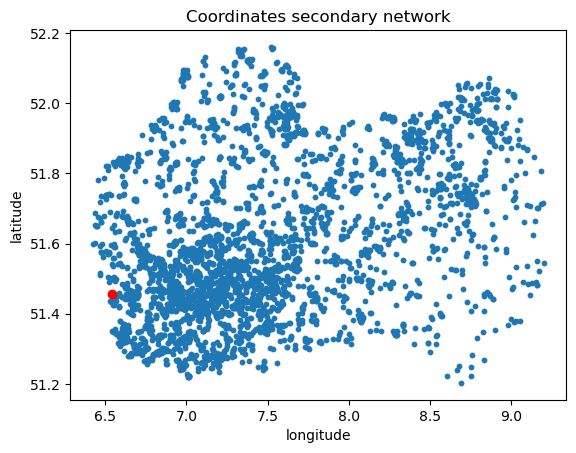

In [26]:
coordinates(ds_emscher, ds_emscher, 'secondary', 5, '-', '-', '-', '-')

In [27]:
# ds_emscher['id']

In [28]:
# ds_emscher.sel(id=1).lon

In [155]:
def coordinates_all_stations_in_range(loc_prim, loc_sec, y, station, ref1, ref2, ref3, ref4, delta, geo, ref_df, all_stations_in_range):
    
    if y == 'primary':
        coords_lon = loc_prim['lon']
        coords_lat = loc_prim['lat']
    elif y == 'secondary':
        coords_lon = loc_sec['lon']
        coords_lat = loc_sec['lat']
    elif y == 'both':
        coords_lon_prim = loc_prim['lon']
        coords_lat_prim = loc_prim['lat']
        coords_lon_sec = loc_sec['lon']
        coords_lat_sec = loc_sec['lat']

    if y == 'both':
        name_plot = 'Coordinates ' + y + ' networks'
        plt.scatter(x=coords_lon_prim, y=coords_lat_prim, s=20, color='red', label='primary network', marker='x', linewidth=1)
        plt.scatter(x=coords_lon_sec, y=coords_lat_sec, s=2, color='blue', label='secondary network', alpha=0.5)
        if type(station) == int:
            plt.scatter(loc_prim['lon'].loc[station], loc_prim['lat'].loc[station], color='black')
        plt.legend()
    else:
        name_plot = 'Coordinates ' + y + ' network: ams' + str(station)
        plt.scatter(x=coords_lon, y=coords_lat, s=10)
        if type(station) == int:
            if y == 'primary':
                plt.scatter(loc_prim['lon'].loc[station], loc_prim['lat'].loc[station], color='red')
            elif y == 'secondary':
                plt.scatter(loc_sec['lon'].loc[station], loc_sec['lat'].loc[station], color='red')

            if all_stations_in_range:
                for station_ref in ref_df.index:
                    plt.scatter(loc_sec['lon'].loc[station_ref], loc_sec['lat'].loc[station_ref], color='lime', s=10)
            else:
                try:
                    plt.scatter(loc_sec['lon'].loc[ref1], loc_sec['lat'].loc[ref1], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref2], loc_sec['lat'].loc[ref2], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref3], loc_sec['lat'].loc[ref3], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref4], loc_sec['lat'].loc[ref4], color='lime', s=10)
                except:
                    pass

    if geo == 'circle':
        kreis = Circle((loc_sec['lon'].loc[station], loc_sec['lat'].loc[station]), radius=1500, color='black', linewidth=0.5, fill=False)
        plt.gca().add_patch(kreis)
    elif geo == 'rectangle':
        quadrat = Rectangle((loc_sec['lon'].loc[station] - 1500, loc_sec['lat'].loc[station] - 1500), 3000, 3000, color='black', linewidth=0.5, fill=False)
        plt.hlines(loc_sec['lat'].loc[station], loc_sec['lon'].loc[station] - 1500, loc_sec['lon'].loc[station] + 1500, linewidths=0.5, color='black')
        plt.vlines(loc_sec['lon'].loc[station], loc_sec['lat'].loc[station] - 1500, loc_sec['lat'].loc[station] + 1500, linewidths=0.5, color='black')
        plt.gca().add_patch(quadrat) 

    plt.axis('equal')

    if type(delta) == int:
        try:
            plt.xlim(loc_sec['lon'].loc[station] - delta, loc_sec['lon'].loc[station] + delta)
        except:
            if ((loc_sec['lon'].loc[station] - delta) < loc_sec['lon'].min()):
                plt.xlim(loc_sec['lon'].min(), loc_sec['lon'].loc[station] + delta)
            if ((loc_sec['lon'].loc[station] + delta) > loc_sec['lon'].max()):
                plt.xlim(loc_sec['lon'].loc[station] - delta, loc_sec['lon'].max())
        try:
            plt.ylim(loc_sec['lat'].loc[station] - delta, loc_sec['lat'].loc[station] + delta)
        except:
            if ((loc_sec['lat'].loc[station] - delta) < loc_sec['lat'].min()):
                plt.ylim(loc_sec['lat'].min(), loc_sec['lat'].loc[station] + delta)
            if ((loc_sec['lat'].loc[station] + delta) > loc_sec['lat'].max()):
                plt.ylim(loc_sec['lat'].loc[station] - delta, loc_sec['lat'].max())
    else:
        pass
    
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(name_plot)

    plt.show()
    plt.close()
    
    return

In [156]:
def find_all_stations_in_range(loc_prim, loc_sec, station, delta, geo, all_stations_in_range):
    coordinates = loc_sec
    # finde stationen, die innerhalb eines bestimmten Bereich um die Station liegen
    # set frame for search
    radius = 1500

    # set coordinates of the station
    lon_station = coordinates['lon'].loc[station]
    lat_station = coordinates['lat'].loc[station]

    list_reference_stations_lon = []
    list_reference_stations_lat = []
    list_station = []
    list_distance = []

    # find the 4 nearest stations in frame
    for i in coordinates.index:
        lon = coordinates['lon'].loc[i]
        lat = coordinates['lat'].loc[i]
        if (np.sqrt((lon - lon_station)**2 + (lat - lat_station)**2) <= radius):
            if lon == lon_station and lat == lat_station:
                pass
            else:
                # print('lon:', lon, 'lat:', lat, '\nstation nr.:', i)
                # print('\n')

                distance = round(np.sqrt((lon - lon_station)**2 + (lat - lat_station)**2), 2)
                
                list_distance.append(distance)
                list_station.append(i)
                list_reference_stations_lon.append(round(lon, 2))
                list_reference_stations_lat.append(round(lat, 2))
        
        array_reference_stations = np.array([list_reference_stations_lon, list_reference_stations_lat, list_distance]).T
        df_reference_stations = pd.DataFrame(array_reference_stations, columns=['lon', 'lat', 'distance'], index=list_station)

    if all_stations_in_range:
        coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, '-', '-', '-', '-', delta, geo, df_reference_stations, all_stations_in_range)
    else:
        if len(df_reference_stations) == 0:
            pass
        elif len(df_reference_stations) == 1:
            coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], '-', '-', '-', delta, geo, df_reference_stations, all_stations_in_range)
        elif len(df_reference_stations) == 2:
            coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], '-', '-', delta, geo, df_reference_stations, all_stations_in_range)
        elif len(df_reference_stations) == 3:
            coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], df_reference_stations.index[2], '-', delta, geo, df_reference_stations, all_stations_in_range)
        elif len(df_reference_stations) == 4:
            coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], df_reference_stations.index[2], df_reference_stations.index[3], delta, geo, df_reference_stations, all_stations_in_range)

    return df_reference_stations

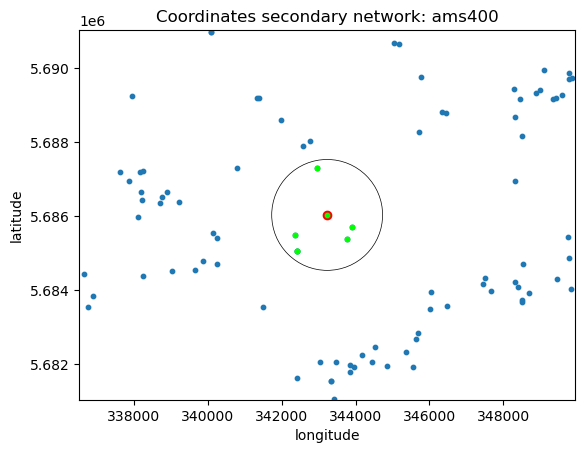

,lon,lat,distance
398,342418.69,5685050.91,1273.71
401,343901.29,5685708.28,743.79
402,342944.15,5687300.84,1301.35
2513,342372.62,5685480.48,1020.45
2655,343233.04,5686033.33,2.35
2968,343781.60,5685391.85,843.77
3504,342420.63,5685048.18,1274.58


In [163]:
find_all_stations_in_range(coordinates_secondary_utm32, coordinates_secondary_utm32, 400, 5000, 'circle', all_stations_in_range=True)